# This is a demonstration notebook for solving inverse AFC plate problem

I will add relevant formulas here later :D

In [1]:
import jax
import jax.numpy as jnp

from jax_plate.Problem import Problem
from jax_plate.Utils import *

### Set material parameters

The geometry, location of test point and loading function are defined in `_problem.edp`. I will change it later when we decide on the format of mesh/geometry, comfortable to the experimental guys

In [10]:
# Aluminum triangle from tuan2015chladni
rho = 2670. # [kg/m^3]
E = 69*1e9 # [Pa]
nu = 0.32 # [1]
h = 1e-3# [m]
D = E*h**3/(12.*(1. - nu**2))
# this value i don't know
beta = .1 # loss factor, [1]

In [28]:
p = Problem("_problem.edp", h, rho)
get_afc = p.getAFCFunction(isotropic_to_full)

beta = .01

N_freqs = 200
freqs = jnp.linspace(500, 625, 201, endpoint=True)
params = jnp.array([D, nu, beta])

ref_afc = get_afc(freqs, params)

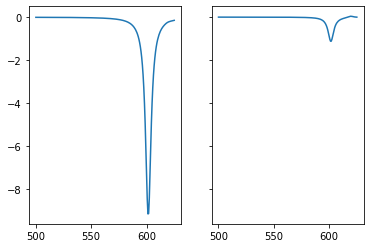

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

axs[0].plot(freqs, ref_afc[:, 0])
axs[1].plot(freqs, ref_afc[:, 1])

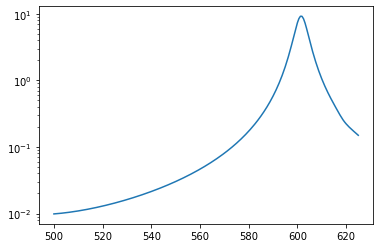

In [30]:
afc_module = jnp.linalg.norm(ref_afc, axis=1, ord=2)
plt.yscale('log')
plt.plot(freqs, afc_module)

Testing if gradient works

In [ ]:
mse_loss = p.getMSELossFunction(isotropic_to_full, freqs, ref_afc)

lam_tikhonov = 1e-1
def regularized_loss(params):
    return mse_loss(params) + lam_tikhonov*jnp.linalg.norm(params, ord=2)


loss_and_grad = jax.jit(jax.value_and_grad(regularized_loss))
other_params = params*jnp.array([0.9, 1.1, 1.1])
print(loss_and_grad(other_params))